## Homework 5
### Exercise 4

First the imports...

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Loading the data from .mat file

* t is for $θ$: temperature
* R is for resistance

In [2]:
data = sio.loadmat("HW5.mat")
Data = data["Data"]
Data_test = data["Data_test"]

In [3]:
t = [d[0] for d in Data]
R = [d[1] for d in Data]
t_test = [d[0] for d in Data_test]
R_test = [d[1] for d in Data_test]

Compute means of variables and the covariance matrix

In [4]:
#mean temperature
mean_t = np.mean(t)
#mean Resistance
mean_R = np.mean(R)
#mean matrix of mean t and mean R
m = np.array([mean_t, mean_R]).reshape(2,1)

#covariance matrix Σ
sigma = 0
for n in range(len(Data)):
    sigma+=((m-Data[n].reshape(2,1)).dot((m-Data[n].reshape(2,1)).transpose()))/len(Data)

In [5]:
print("Mean matrix is:\n", m[0].round(4), "\n",  m[1].round(4))
print("Covariance matrix is:\n", sigma[0].round(4), "\n",  sigma[1].round(4))

Mean matrix is:
 [20.0016] 
 [26.9967]
Covariance matrix is:
 [300.9644 105.3611] 
 [105.3611  36.8875]


Assuming that $t$ and $R$ are jointly distributed according to the normal distribution $p(t, R) = N(μ,Σ)$ and knowing the mean and covariance matrices of $t$, $R$; we can easily compute $E[R|t]$:

$E[R|t]=μ_R +α \frac{σ_R}{σ_t}(t-μ_t)$, where $α=\frac{σ_{tR}}{σ_tσ_R}$

$α \frac{σ_R}{σ_t}=\frac{σ_{tR}}{σ_tσ_R}\frac{σ_R}{σ_t}=\frac{σ_{tR}}{{σ_t}^2}=\frac{105.3611}{300.9644}=0.35$

Thus, $R = f(θ) = E[R|t]=26.9967+0.35(t-20.0016)$

Now, to test the performance of our regressor:

In [6]:
#estimations of R based on the model we came up with
R_est = [26.9967+0.35*(t-20.0016) for t in t_test]

In [7]:
#computation of mse between the ral and the estimated values of R
mse = mean_squared_error(R_est, R_test)
"MSE: {:f}".format(mse)

'MSE: 0.000015'

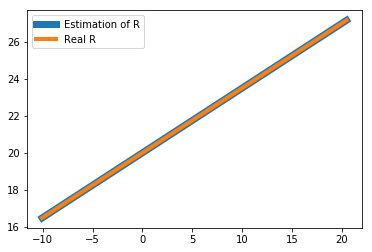

In [8]:
fig = plt.figure()
ax  = fig.add_subplot(111)

ax.plot(t_test, R_est,
        label = "Estimation of R",
        linewidth = 7.0)
ax.plot(t_test, R_test,
        label = "Real R",
        linewidth = 4.0)
leg = plt.legend()
plt.show()

As we can see, both real and estimated values of R lie on the same line. Thus, the hypothesis that the joint pdf is normal seems to be valid.
Also, mse's value is low.